In [0]:
# MLP NN

In [0]:
# lib load
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

In [0]:
# MLPClassifier
# sklearn.neural.network.MLPClassifier()
# this provides multi layer perceptron (MLP), using back propagation

## Part of params
# hidden_layer_size: array, for the structure of hidden layer, (97, 98) means totally we have 2 hidden layers and the first hidden layer has 97 neurons whereas the second one has 98 neurons. The default is just one hidden layer with 100 neurons
# activation: string, 'logistic' or 'tanh' or 'relu'
# algorithm: a string, could be 'l-bfgs' for small dataset, 'sgd', 'adam' for big dataset, the optimal for stochastic gradient based algo
# alpha, float for regularization
# max_iter: integer for biggest iteration
# tol: float, the threshold to convergence
# learning_rate_int: a float, initial learning rate. Meaningful while just adam or sgd
# verbose: bool, True then input the intermediate info
# early_stopping: bool, True then apply it, it is meaningful only while using sgd or adam
# validation_fraction: fraction of the training data to be used as validation data, the model will set apart this fraction of the training data, will not train on it and will evaluate the loss_, classes_. coef_, intercepts_, n_iter_ on it.

In [0]:
# create a dataset which is linearly non-separable
def create_data_no_linear_2d(n):
  np.random.seed(1)
  x_11 = np.random.randint(0,100,(n,1))
  x_12 = np.random.randint(-5,5,(n,1,))
  x_21 = np.random.randint(0,100,(n,1))
  x_22 = np.random.randint(0,10,(n,1))
  x_31 = np.random.randint(0,100,(int(n/10),1))
  x_32 = np.random.randint(0,10,(int(n/10),1))


  new_x_11 = x_11*np.sqrt(2)/2-x_12*np.sqrt(2)/2 ## rotate 45 degree through x axis
  new_x_12 = x_11*np.sqrt(2)/2+x_12*np.sqrt(2)/2 ## rotate 45 degree through x axis
  new_x_21 = x_21*np.sqrt(2)/2-x_22*np.sqrt(2)/2 ## rotate 45 degree through x axis
  new_x_22 = x_21*np.sqrt(2)/2+x_22*np.sqrt(2)/2 ## rotate 45 degree through x axis
  new_x_31 = x_31*np.sqrt(2)/2-x_32*np.sqrt(2)/2 ## rotate 45 degree through x axis
  new_x_32 = x_31*np.sqrt(2)/2+x_32*np.sqrt(2)/2 ## rotate 45 degree through x axis

  plus_samples = np.hstack([new_x_11, new_x_12, np.ones((n,1))])
  minus_samples = np.hstack([new_x_21, new_x_22,-np.ones((n,1))])
  err_samples = np.hstack([new_x_31, new_x_32, np.ones((int(n/10),1))])
  samples = np.vstack([plus_samples, minus_samples, err_samples])
  np.random.shuffle(samples) # mixed data
  return samples

In [0]:
# plot
def plot_samples_2d(ax, samples):
  Y=samples[:,-1]
  position_p = Y == 1
  position_m = Y == -1
  ax.scatter(samples[position_p,0], samples[position_p,1],
             marker='+', label='+', color='b')
  ax.scatter(samples[position_m,0], samples[position_m,1],
             marker='^', label='-', color='y')

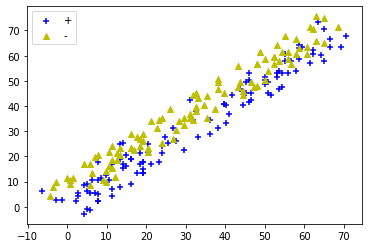

In [0]:
# run a instance
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
data = create_data_no_linear_2d(100)
plot_samples_2d(ax,data)
ax.legend(loc='best')
plt.show()

In [0]:
# using MLEClassifier to deal with non linear dataset
def predict_with_MLP(ax, train_data):
  train_x=train_data[:,:-1]
  train_y=train_data[:,-1]
  clf=MLPClassifier(activation='logistic', max_iter=1000)
  clf.fit(train_x,train_y)
  print(clf.score(train_x,train_y))

  x_min, x_max = train_x[:,0].min() -1, train_x[:,0].max() +2
  y_min, y_max = train_x[:,1].min() -1, train_x[:,1].max() +2
  plot_step = 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

0.7761904761904762


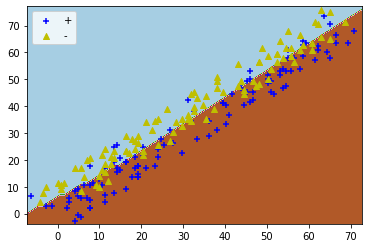

In [0]:
# run prediction
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
data = create_data_no_linear_2d(100)
predict_with_MLP(ax, data)
plot_samples_2d(ax,data)
ax.legend(loc='best')
plt.show()